Using TensorFlow backend.


Found 5480 images belonging to 7 classes.
Found 1813 images belonging to 7 classes.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 200, 3)       0         
_________________________________________________________________
model_1 (Model)              multiple                  21802784  
_________________________________________________________________
permute (Permute)            (None, 4, 3, 2048)        0         
_________________________________________________________________
flatten (TimeDistributed)    (None, 4, 6144)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 98384     
_________________________________________________________________
output_vgg (Dense)           (None, 7)                 35        
Total params: 21,901,203
Trainable params

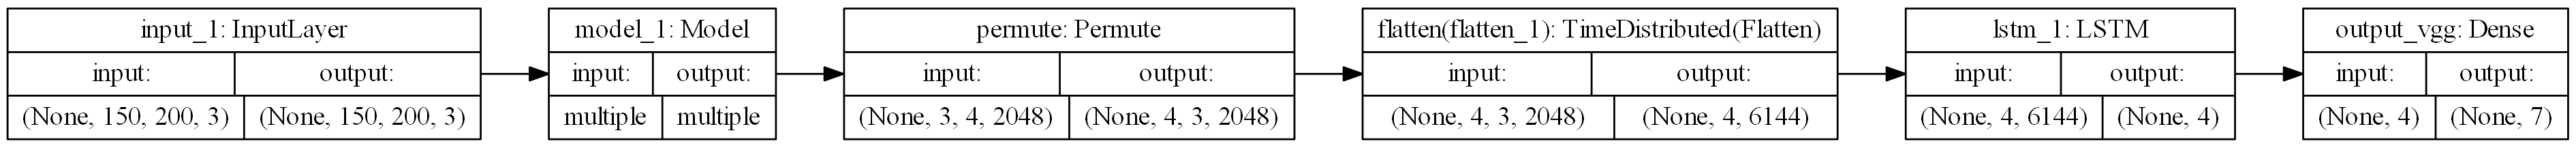

In [1]:
from keras.models import *
from keras.layers import *
from keras import optimizers
from keras import backend as K
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Permute
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import matplotlib.pyplot as plt
import os

base_dir = 'D:\\RGB_dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

batch_size = 128

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150,200),
                        batch_size=batch_size)


validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150,200),
                        batch_size=batch_size)


input_tensor = Input((150, 200, 3))

incep = InceptionV3(weights='imagenet', include_top=False)
cnn_model = Model(inputs=incep.input, outputs=incep.get_layer('mixed10').output)

x = cnn_model(input_tensor)

conv_shape = x.get_shape().as_list()
x = Permute((2,1,3),name='permute')(x)
x = TimeDistributed(Flatten(), name='flatten')(x)

lstm = LSTM(4, return_sequences=False)(x)

x = Dense(7, activation='softmax', name='output_vgg')(lstm)

base_model = Model(input_tensor, x)
print(base_model.summary())

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

base_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.Adam(lr=2e-4),
                   metrics=['acc'])


plot_model(base_model, to_file='base_model.png', show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=200)

# history = base_model.fit_generator(
#                         train_generator,
#                         steps_per_epoch=steps_per_epoch,
#                         epochs=1,
#                         validation_data=validation_generator,
#                         validation_steps=validation_steps)


# train_acc = history.history['acc']
# train_loss = history.history['loss']
# val_acc = history.history['val_acc']
# val_loss = history.history['val_loss']

# epoch = range(1,len(train_acc)+1)

# plt.plot(epoch,train_acc,'r',label='train accuracy')
# plt.plot(epoch,val_acc,'g',label='validation accuracy')
# plt.title('train and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epoch,train_loss,'r',label='train loss')
# plt.plot(epoch,val_loss,'g',label='validation loss')
# plt.title('train nad validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

In [2]:
from keras.models import *
from keras.layers import *
from keras import optimizers
from keras import backend as K
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Permute
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import matplotlib.pyplot as plt
import os

# base_dir = 'D:\\testFatigue'
# train_dir = os.path.join(base_dir,'train')
# validation_dir = os.path.join(base_dir,'validation')

# batch_size = 128

# train_datagen = ImageDataGenerator(
#                 rescale=1./255,
#                 rotation_range=40,
#                 width_shift_range=0.2,
#                 height_shift_range=0.2,
#                 shear_range=0.2,
#                 zoom_range=0.2,
#                 horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#                         train_dir,
#                         target_size=(150,200),
#                         batch_size=batch_size)


# validation_generator = test_datagen.flow_from_directory(
#                         validation_dir,
#                         target_size=(150,200),
#                         batch_size=batch_size)


input_tensor = Input((150, 200, 3))

incep = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 200, 3))

print(incep.output)
# cnn_model = Model(inputs=incep.input, outputs=incep.output)
# x = cnn_model(input_tensor)

# x = Reshape((24, 4, -1))(x)
# #x = Permute((2,1,3))(x)
# x = TimeDistributed(Flatten())(x)

# lstm = LSTM(256)(x)
# x = Dropout(0.25)(lstm)
# x = Dense(3, activation='softmax')(x)

# base_model = Model(input_tensor, x)

# steps_per_epoch = len(train_generator)
# validation_steps = len(validation_generator)

# base_model.compile(loss='categorical_crossentropy',
#                    optimizer=optimizers.Adam(lr=2e-4),
#                    metrics=['acc'])

# plot_model(base_model, to_file='base_model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=200)

# print(base_model.summary())

# history = base_model.fit_generator(
#                         train_generator,
#                         steps_per_epoch=steps_per_epoch,
#                         epochs=30,
#                         validation_data=validation_generator,
#                         validation_steps=validation_steps)


# base_model.save('inceptionv3_lstm_timeStep24.h5')

# train_acc = history.history['acc']
# train_loss = history.history['loss']
# val_acc = history.history['val_acc']
# val_loss = history.history['val_loss']

# epoch = range(1,len(train_acc)+1)

# plt.plot(epoch,train_acc,'r',label='train accuracy')
# plt.plot(epoch,val_acc,'g',label='validation accuracy')
# plt.title('train and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epoch,train_loss,'r',label='train loss')
# plt.plot(epoch,val_loss,'g',label='validation loss')
# plt.title('train nad validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

Tensor("mixed10/concat:0", shape=(None, 3, 4, 2048), dtype=float32)
